In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Theo Hernández,fr FRA,DF,Milan,it Serie A,25.0,1997.0,97.0,95.0,8415,93.5,0.17,0.31,0.15,0.29,0.13,0.28,0.11,0.26,272.0,141.0,52.0,118.0,43.0,68.72,2.58,16.66,33.33,19.91,2.24,68.68,2.91,1.51,1.26,39.18,278.91,174.26,4.00,2.88,0.76,1.74,0.75,43.07,5.08,3.040000,0.380000,1.86,0.49,0.15,0.18,0.31,1.86,0.29,0.02,0.02,0.03,0.01,0.01,4322.0,5383.0,80.0,69809.0,23453.0,2291.0,2557.0,90.0,1580.0,1904.0,83.0,336.0,593.0,57.0,0.00,0.15,0.14,-0.01,1.39,3.25,1.20,0.39,4.03,57.57,47.03,10.36,1.73,0.06,0.59,3.15,7.86,0.77,0.04,0.68,0.00,46.22,0.18,1.28,1.480000,0.400000,3.60,13.42,2.33,3.9,3.6,67.0,0.25,0.02,0.01,1.02,2.27,0.17,0.83,0.94,0.02,0.00,6.63,1.20,0.58,3,0,0,3,0,0
1,1,Marcel Sabitzer,at AUT,MF,RB Leipzig+RB Leipzig+Bayern Munich+Manchester...,de Bundesliga+eng Premier League+de Bundesliga,29.0,1994.0,80.0,46.0,53186,47.1,0.21,0.34,0.13,0.25,0.25,0.31,0.17,0.25,38.0,22.0,58.0,15.0,39.0,71.53,1.78,12.23,40.19,19.51,2.02,71.44,0.81,0.47,0.32,38.74,162.38,72.17,1.27,1.38,0.17,1.32,0.98,49.37,3.82,11.670000,1.170000,2.38,0.02,0.00,0.17,0.08,2.38,0.26,0.00,0.00,0.02,0.00,0.00,2306.0,2878.0,80.0,35602.0,10553.0,1258.0,1433.0,88.0,806.0,954.0,84.0,147.0,272.0,54.0,0.06,0.12,0.17,0.00,1.19,5.12,1.51,0.24,7.05,61.10,57.54,3.04,1.51,0.12,0.53,1.12,1.38,0.04,0.02,0.00,0.00,48.96,0.53,1.21,9.360000,2.940000,0.29,0.94,0.24,-1.5,-2.3,48.0,0.25,0.00,0.00,1.12,1.32,0.19,1.34,1.08,0.00,0.00,6.73,0.98,1.04,3,1,0,0,0,3
2,2,Dejan Kulusevski,se SWE,"MF,FW",Juventus+Tottenham+Juventus,it Serie A+eng Premier League+it Serie A,23.0,2000.0,103.0,61.0,1265762,67.0,0.18,0.49,0.18,0.49,0.15,0.36,0.15,0.36,260.0,138.0,53.0,114.0,44.0,46.15,0.64,6.18,17.72,23.27,5.04,46.15,3.88,2.06,1.70,29.58,207.92,110.02,3.97,2.09,1.76,3.33,2.06,

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
defense_players = final_player[final_player['Pos'].isin(['DF'])]
newbie = newbie[newbie['Pos'].isin(['DF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['DF'])]

# Reset the index if needed
defense_players = defense_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [6]:
DeLigt=defense_players[defense_players['Player']=='Matthijs de Ligt']
DeLigt

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
74,193,Matthijs de Ligt,nl NED,DF,Juventus+Bayern Munich,it Serie A+de Bundesliga,23.0,1999.0,89.0,81.0,7297,81.1,0.09,0.12,0.09,0.12,0.05,0.08,0.05,0.08,17.0,10.0,59.0,7.0,41.0,77.03,8.51,34.06,39.46,3.84,1.27,77.03,0.21,0.12,0.09,47.86,225.62,117.68,0.63,0.39,0.0,0.42,0.11,55.51,0.32,0.9,0.12,0.7,0.0,0.02,0.13,0.02,0.7,0.07,0.0,0.0,0.05,0.0,0.0,5016.0,5531.0,91.0,97361.0,32015.0,1616.0,1735.0,93.0,2883.0,3038.0,95.0,479.0,653.0,73.0,0.0,0.03,0.04,0.01,0.29,4.03,0.19,0.05,3.75,68.2,66.23,1.84,1.28,0.01,0.4,0.13,0.24,0.0,0.0,0.0,0.0,61.85,0.14,0.25,0.76,0.3,3.0,7.84,1.65,3.0,3.0,62.0,0.15,0.01,0.01,1.12,0.68,0.07,0.99,0.75,0.0,0.05,5.35,3.0,1.81,3,0,0,2,0,1


In [7]:
DeLigt_2024=player_2024[player_2024['Player']=='Matthijs de Ligt']
DeLigt_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
275,1476,Matthijs de Ligt,nl NED,DF,Bayern Munich,de Bundesliga,0.0,1999.0,22,16,1390,15.4,0.13,0.13,0.13,0.13,0.11,0.12,0.11,0.12,2.0,2.0,100.0,0.0,0.0,86.36,7.66,31.82,49.87,4.87,1.36,86.36,0.13,0.13,0.0,55.26,283.96,157.34,1.04,0.97,0.13,0.58,0.13,66.36,0.39,0.84,0.06,0.71,0.0,0.0,0.13,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,1120.0,1193.0,93.9,21822.0,7091.0,313.0,330.0,94.8,709.0,730.0,97.1,93.0,121.0,76.9,0.0,0.01,0.04,-0.01,0.19,7.08,0.06,0.06,6.36,77.47,75.91,1.49,1.23,0.0,0.19,0.13,0.06,0.0,0.0,0.0,0.0,72.73,0.06,0.26,0.91,0.39,0.14,0.33,0.12,0.3,0.3,59.4,0.32,0.0,0.0,0.78,0.52,0.0,1.23,0.78,0.0,0.0,4.74,2.66,1.82,0.97,0.26,0.52,0.19,0.39,0.71,0.32,0.91,0.65,2.21,3.38,0.0,54.5


In [8]:
DeLigt_2023=player_2023[player_2023['Player']=='Matthijs de Ligt']
DeLigt_2023

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
296,1532,Matthijs de Ligt,nl NED,DF,Bayern Munich,de Bundesliga,22,1999,31,27,2403,26.7,0.11,0.15,0.11,0.15,0.04,0.06,0.04,0.06,4.0,0.0,0.0,4.0,100.0,86.97,7.68,38.13,44.31,4.94,1.46,86.97,0.15,0.0,0.15,59.63,280.56,147.64,0.64,0.45,0.0,0.41,0.11,63.82,0.52,0.94,0.11,0.79,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,1902.0,2088.0,91.1,36626.0,12291.0,619.0,660.0,93.8,1114.0,1178.0,94.6,162.0,216.0,75.0,0.0,0.02,0.03,0.02,0.22,5.81,0.22,0.04,5.36,78.2,76.33,1.69,1.42,0.0,0.56,0.07,0.22,0.0,0.0,0.0,0.0,71.24,0.19,0.3,0.86,0.3,0.13,0.38,0.05,1.9,1.9,60.0,0.15,0.0,0.0,0.71,0.64,0.07,0.86,0.86,0.0,0.07,6.18,3.6,2.4,1.2,0.56,0.6,0.04,0.56,0.9,0.34,1.16,0.75,2.06,3.18,0.0,62.5


In [9]:
DeLigt_2022=player_2022[player_2022['Player']=='Matthijs de Ligt']
DeLigt_2022

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
304,1515,Matthijs de Ligt,nl NED,DF,Juventus,it Serie A,21,1999,31,29,2674,29.7,0.1,0.13,0.1,0.13,0.05,0.09,0.05,0.09,6.0,4.0,66.7,2.0,33.3,66.23,8.82,31.45,31.89,3.13,1.21,66.23,0.2,0.13,0.07,37.88,174.07,86.23,0.61,0.34,0.0,0.4,0.1,45.66,0.2,0.74,0.07,0.54,0.0,0.03,0.1,0.03,0.03,0.07,0.0,0.0,0.0,0.0,0.0,1510.0,1704.0,88.6,29785.0,10135.0,482.0,522.0,92.3,841.0,899.0,93.5,170.0,241.0,70.5,0.0,0.03,0.04,0.0,0.3,2.49,0.13,0.03,2.29,57.37,55.32,1.95,1.14,0.03,0.4,0.13,0.3,0.0,0.0,0.0,0.0,50.84,0.1,0.2,0.67,0.34,0.15,0.3,0.08,1.4,1.4,63.1,0.13,0.03,0.03,1.08,0.51,0.07,0.88,0.64,0.0,0.03,4.34,3.0,1.75,1.14,0.71,0.44,0.0,0.51,0.61,0.1,1.04,0.71,2.02,3.47,0.0,83.3


In [10]:
for column in defense_players.columns:
    print(column)

Unnamed: 0
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Goals_per90
G+A_per90
G-PK_per90
G+A-PK_per90
xG_per90
xG+xAG_per90
npxG_per90
npxG+xAG_per90
Take_Ons_Attempted
Take_Ons_Succ
Take_Ons_Succ%
Tackled_Take_Ons
Tackled_Take_Ons%
Touches_per_90
Touches_Def_Pen_per_90
Touches_Def_3rd_per_90
Touches_Mid_3rd_per_90
Touches_Att_3rd_per_90
Touches_Att_Pen_per_90
Tocuhes_Live_Balls_per_90
Take_Ons_Attempted_per_90
Take_Ons_Succ_per_90
Tackled_Take_Ons_per_90
Carries_per_90
Total_Distance_per_90
Progressive_Distance_Carried_per_90
Progressive_Carries_per_90
1/3_Carries_per_90
Carries_Penalty_Area_per_90
Miscontrols_per_90
Dispossessed_per_90
Passes_Received_per_90
Progressive_Passes_Received_per_90
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per_90
Pass_Dead_Shot_per_90
Take_Ons_Shot_per_90
Shot-Shot_per_90
Fouls_drawn_Shot_per_90
Defensive_Shot_per_90
Pass_Live_Goal_per_90
Pass_Dead_Goal_per_90
Take_Ons_Goal_per_90
Shot_Goal_per_90
Fouls_Drawn_Goal_per_90


In [11]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
deligt_percentile_ranks = round(players_percentile_ranks.iloc[[74]],0)

# Print the percentile ranks for Declan Rice
print(deligt_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
74         87.0       72.0        87.0          72.0      59.0          46.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
74        60.0            46.0                32.0           30.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
74            54.0              41.0               63.0            88.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
74                    83.0                    83.0                    88.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
74                    42.0                    74.0                       88.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
74                       17.0                  15.0                     29.0   

    Carries_per_90  Total_Distance_per_90  \
74            87.0     

In [12]:
# Extract the percentile ranks, transpose, and sort them in descending order
deligt_percentile_ranks_sorted = deligt_percentile_ranks.T.sort_values(by=74, ascending=False)

# Get the top 20 parameters
top_20_params = deligt_percentile_ranks_sorted.index[:30]
top_20_params_values = deligt_percentile_ranks_sorted[74].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Npxg_net', 'Xg_net', 'Passes_Medium_Att', 'Passes_Medium_Cmp%',
       'Passes_Total_Cmp%', 'Shot_Goal_per_90', 'Passes_Medium_Cmp',
       'Passes_TotDist', 'Passes_Long_Cmp%', 'Passes_Total_Cmp',
       'Passes_Total_Att', 'Passes_PrgDist', 'Live_Ball_Passes_per_90',
       'Passes_Cmp_per_90', 'Aerials_Won_per_90', 'Passes_Long_Cmp',
       'Passes_Received_per_90', 'Shot-Shot_per_90', 'Passes_Short_Cmp%',
       'Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
       'Tocuhes_Live_Balls_per_90', 'Touches_per_90', 'Aerials_Lost_per_90',
       'Goals_per_shot', 'Goals_per90', 'Carries_per_90', 'G-PK_per90',
       'Shots_on_target_per90', 'Passes_Short_Cmp'],
      dtype='object')
Values:
Npxg_net                     98.0
Xg_net                       98.0
Passes_Medium_Att            97.0
Passes_Medium_Cmp%           97.0
Passes_Total_Cmp%            97.0
Shot_Goal_per_90             97.0
Passes_Medium_Cmp            97.0
Passes_TotDist               9

In [13]:
import pandas as pd







params=['Goals_per90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Total_Att','Passes_Cmp_per_90', 'Aerials_Won_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Aerials_Lost_per_90','Goals_per_shot', 
        'Goals_per90', 'Carries_per_90','Shots_on_target_per90', ]



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
deligt_percentile_ranks = round(players_percentile_ranks.iloc[[78]],0)

# Print the percentile ranks for Declan Rice
print(deligt_percentile_ranks)


    Goals_per90  Passes_TotDist  Passes_Total_Cmp  Passes_Total_Att  \
78         77.0            87.0              90.0              87.0   

    Passes_Cmp_per_90  Aerials_Won_per_90  Passes_Received_per_90  \
78               86.0                80.0                    83.0   

    Passes_Attempted_per_90  Touches_Mid_3rd_per_90  Touches_per_90  \
78                     85.0                    84.0            86.0   

    Aerials_Lost_per_90  Goals_per_shot  Goals_per90  Carries_per_90  \
78                 27.0            71.0         77.0            83.0   

    Shots_on_target_per90  
78                   75.0  


In [14]:
len(params)

15

In [15]:
deligt_percentile_ranks_list = deligt_percentile_ranks.values.flatten().tolist()

deligt_percentile_ranks_list

[77.0,
 87.0,
 90.0,
 87.0,
 86.0,
 80.0,
 83.0,
 85.0,
 84.0,
 86.0,
 27.0,
 71.0,
 77.0,
 83.0,
 75.0]

In [16]:
image_path = "matthijs-de-ligt.png"
fdj_cropped = Image.open(image_path)


In [17]:
split_params = [param.replace('_', '\n') for param in params]


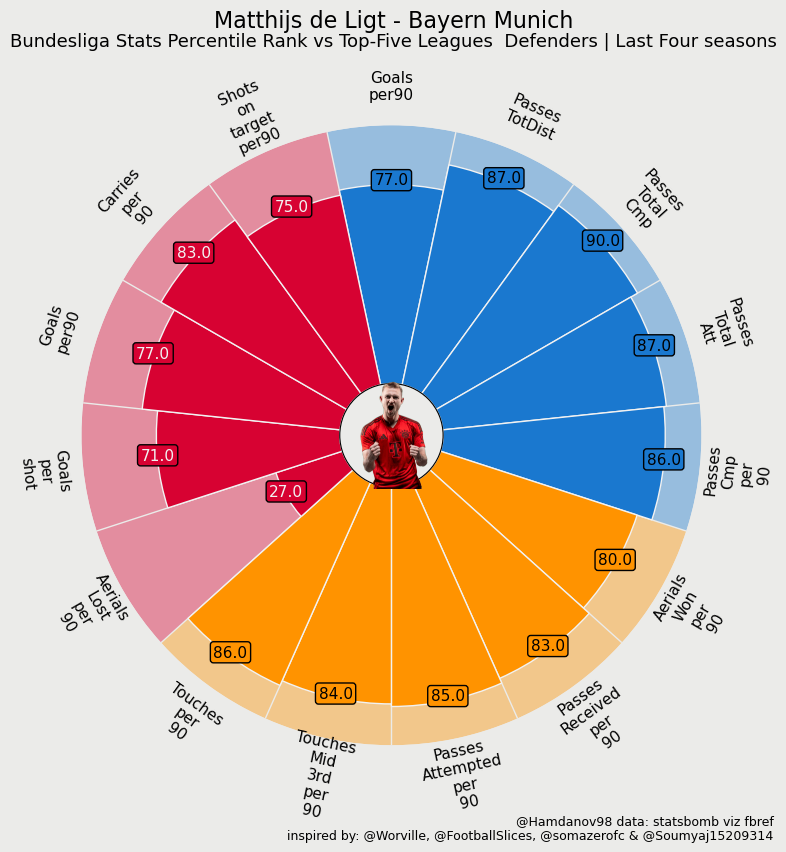

In [18]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    deligt_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Matthijs de Ligt - Bayern Munich", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues  Defenders | Last Four seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('De Ligt/Deligt_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [19]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
deligt_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[275]],0)

# Print the percentile ranks for Declan Rice
print(deligt_2024_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
275         90.0       68.0        91.0          68.0      94.0          67.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
275        94.0            68.0                 9.0           18.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
275            98.0               6.0                6.0            92.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
275                    68.0                    72.0                    96.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
275                    43.0                    73.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
275                       92.0                       11.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
275                  22.0                      6.0            92.0   

     Tota

In [20]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
deligt_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[296]],0)

# Print the percentile ranks for Declan Rice
print(deligt_2023_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
296         92.0       81.0        92.0          81.0      50.0          32.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
296        50.0            32.0                16.0            2.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
296             2.0              45.0               99.0            96.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
296                    71.0                    93.0                    95.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
296                    48.0                    82.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
296                       96.0                       12.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
296                   2.0                     40.0            96.0   

     Tota

In [21]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
deligt_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[304]],0)

# Print the percentile ranks for Declan Rice
print(deligt_2022_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
304         85.0       71.0        85.0          72.0      63.0          55.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
304        64.0            56.0                30.0           30.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
304            60.0              34.0               42.0            62.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
304                    87.0                    73.0                    68.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
304                    37.0                    71.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
304                       62.0                       20.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
304                  20.0                     27.0            67.0   

     Tota

In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90', 'Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in defense_players.columns:
        defense_players[feature] = -defense_players[feature]
        player_2024[feature]=-player_2024[feature]

In [23]:
# Normalize data
numerical_defense_players = defense_players[params].replace([np.inf, -np.inf], 0)
normalized_defense_players = (numerical_defense_players - numerical_defense_players.mean()) / numerical_defense_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_defense_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [24]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_defense_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=defense_players.index)

In [25]:
# Get de Ligt's row and compute cosine similarity
deligt_index = defense_players.index[defense_players['Player'] == 'Matthijs de Ligt'][0]
deligt_data = transformed_df.loc[deligt_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=deligt_index)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, deligt_data).flatten()
transformed_df['similarity_to_deligt'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_deligt', ascending=False).index
top_similar_players = defense_players.loc[top_similar_players_indices]

In [27]:
# Visualize the results
defense_players['similarity_to_deligt'] = transformed_df['similarity_to_deligt']
defense_players_sorted = defense_players.sort_values(by='similarity_to_deligt', ascending=False)
defense_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_deligt
180,504,Guillermo Maripán,cl CHI,DF,Monaco,fr Ligue 1,29.0,1994.0,80.0,68.0,6078,67.6,0.12,0.14,0.12,0.14,0.06,0.08,0.06,0.08,13.0,7.0,54.0,5.0,38.0,71.04,7.38,32.97,36.71,1.68,0.99,71.04,0.20,0.11,0.08,45.93,222.28,125.04,0.49,0.27,0.03,-0.42,-0.10,49.97,0.09,0.55,0.11,0.48,0.00,0.00,0.04,0.00,0.48,0.07,0.00,0.0,0.03,0.00,0.0,3711.0,4182.0,89.0,76995.0,26673.0,950.0,1037.0,92.0,2276.0,2425.0,94.0,458.0,634.0,72.0,0.0,0.01,0.02,0.00,0.10,2.88,0.15,0.01,3.42,61.87,60.16,1.61,1.47,0.03,0.34,0.06,0.04,0.0,0.0,0.0,0.0,54.90,0.09,0.41,0.56,0.21,4.95,13.48,2.49,3.6,3.6,54.0,-0.27,-0.01,-0.01,-0.96,0.35,0.03,1.33,0.90,0.0,-0.06,5.43,1.98,-1.70,3,0,0,0,3,0,0.872964
293,816,Virgil van Dijk,nl NED,DF,Liverpool,eng Premier League,30.0,1991.0,66.0,66.0,5895,65.5,0.09,0.12,0.09,0.12,0.07,0.11,0.07,0.11,9.0,7.0,78.0,2.0,22.0,88.09,10.09,40.05,44.90,3.33,1.88,88.09,0.14,0.11,0.03,53.08,201.13,99.71,0.32,0.27,0.03,-0.18,-0.05,63.83,0.18,0.81,0.14,0.60,0.02,0.00,0.16,0.00,0.60,0.09,0.00,0.0,0.05,0.00,0.0,4721.0,5247.0,90.0,92382.0,34832.0,1623.0,1748.0,93.0,2534.0,2681.0,95.0,522.0,739.0,71.0,0.0,0.04,0.03,-0.01,0.24,4.76,0.15,0.00,4.15,80.11,77.36,2.70,2.20,0.11,0.75,0.01,0.25,0.0,0.0,0.0,0.0,72.07,0.05,0.22,0.99,0.35,3.14,8.87,2.30,1.4,1.4,76.0,-0.09,-0.00,-0.00,-0.33,0.17,0.05,0.94,0.36,0.0,-0.01,5.68,3.28,-1.04,2,2,0,0,0,0,0.852561
158,447,Marquinhos,br BRA,DF,Paris S-G,fr Ligue 1,29.0,1994.0,90.0,86.0,7706,85.6,0.12,0.13,0.12,0.13,0.09,0.11,0.09,0.11,10.0,6.0,60.0,4.0,40.0,82.02,9.70,33.82,44.84,3.80,1.17,82.02,0.12,0.07,0.05,60.54,298.17,168.54,0.31,0.62,0.05,-0.35,-0.15,63.06,0.35,0.68,0.10,0.59,0.01,0.00,0.08,0.00,0.59,0.09,0.00,0.0,0.01,0.00,0.0,5921.0,6322.0,94.0,108262.0,38198.0,2269.0,23

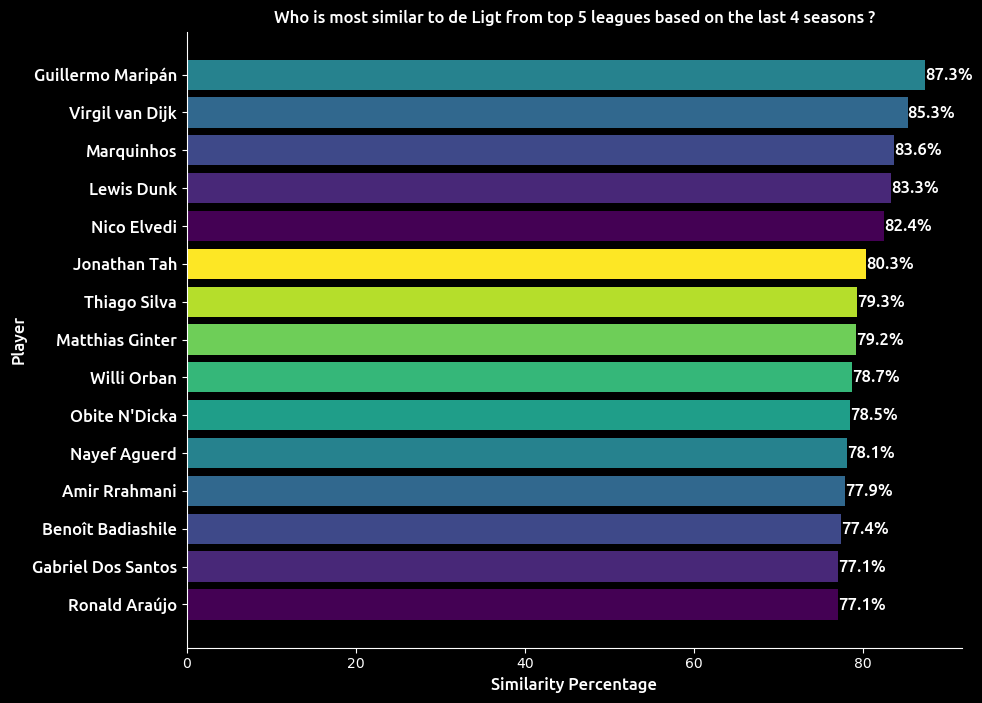

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the defense_players DataFrame by similarity_to_deligt in descending order
defense_players_sorted = defense_players.sort_values(by='similarity_to_deligt', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defense_players_sorted['Player'].head(15)[::-1], (defense_players_sorted['similarity_to_deligt'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to de Ligt from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defense_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('De Ligt/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [29]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [30]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [31]:
# Get de Ligt's row and compute cosine similarity
deligt_index = player_2024.index[player_2024['Player'] == 'Matthijs de Ligt'][0]
deligt_data = transformed_df.loc[deligt_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=deligt_index)

In [32]:
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, deligt_data).flatten()
transformed_df['similarity_to_deligt_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_deligt_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [33]:
# Visualize the results
player_2024['similarity_to_deligt_2024'] = transformed_df['similarity_to_deligt_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_deligt_2024', ascending=False)
player_2024_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_deligt_2024
401,2164,Jarell Quansah,eng ENG,DF,Liverpool,eng Premier League,0.0,2003.0,17,13,1190,13.2,0.15,0.15,0.15,0.15,0.08,0.08,0.08,0.08,7.0,4.0,57.1,3.0,42.9,97.27,6.97,39.47,54.85,3.48,0.61,97.27,0.53,0.30,0.23,67.73,374.47,189.17,0.98,0.76,0.00,-0.23,-0.15,72.12,0.08,0.98,0.08,0.98,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.0,0.00,0.00,0.0,1038.0,1172.0,88.6,18672.0,6199.0,368.0,392.0,93.9,595.0,633.0,94.0,61.0,115.0,53.0,0.00,0.01,0.02,-0.01,0.23,5.23,0.08,0.00,5.08,88.79,86.89,1.67,1.21,0.08,0.38,0.00,0.30,0.00,0.0,0.00,0.0,78.64,0.23,0.15,0.45,0.30,0.33,0.50,0.17,1.0,1.0,67.2,-0.08,-0.00,-0.00,-0.76,0.15,0.00,1.29,1.67,0.0,-0.08,5.45,3.41,-1.67,1.89,1.29,0.53,0.08,1.06,1.52,0.45,1.21,0.61,3.18,2.95,0.08,70.0,0.754396
284,1505,David López,es ESP,DF,Girona,es La Liga,0.0,1989.0,25,25,1965,21.8,0.14,0.14,0.14,0.14,0.10,0.11,0.09,0.10,9.0,5.0,55.6,2.0,22.2,81.19,13.12,43.39,36.01,2.20,1.01,81.19,0.41,0.23,0.09,49.68,272.20,151.74,0.69,0.41,0.00,-0.55,-0.09,58.76,0.05,0.60,0.05,0.37,0.05,0.05,0.14,0.00,0.00,0.05,0.00,0.0,0.00,0.00,0.0,1468.0,1582.0,92.8,26089.0,8718.0,520.0,551.0,94.4,849.0,882.0,96.3,76.0,115.0,66.1,0.00,0.01,0.02,-0.01,0.18,2.20,0.05,0.00,2.48,72.57,68.76,3.72,1.51,0.00,0.14,0.00,0.09,0.00,0.0,0.00,0.0,67.34,0.09,0.18,0.73,0.23,0.19,0.60,0.12,0.9,1.1,45.7,-0.18,-0.00,-0.00,-0.78,0.69,0.05,0.92,0.92,0.0,-0.05,5.55,1.47,-1.74,1.51,0.96,0.55,0.00,0.78,1.01,0.23,1.28,0.87,2.43,2.89,0.18,77.3,0.727069
227,1232,Juan Jesus,br BRA,DF,Napoli,it Serie A,0.0,1991.0,24,23,2116,23.5,0.04,0.04,0.04,0.04,0.

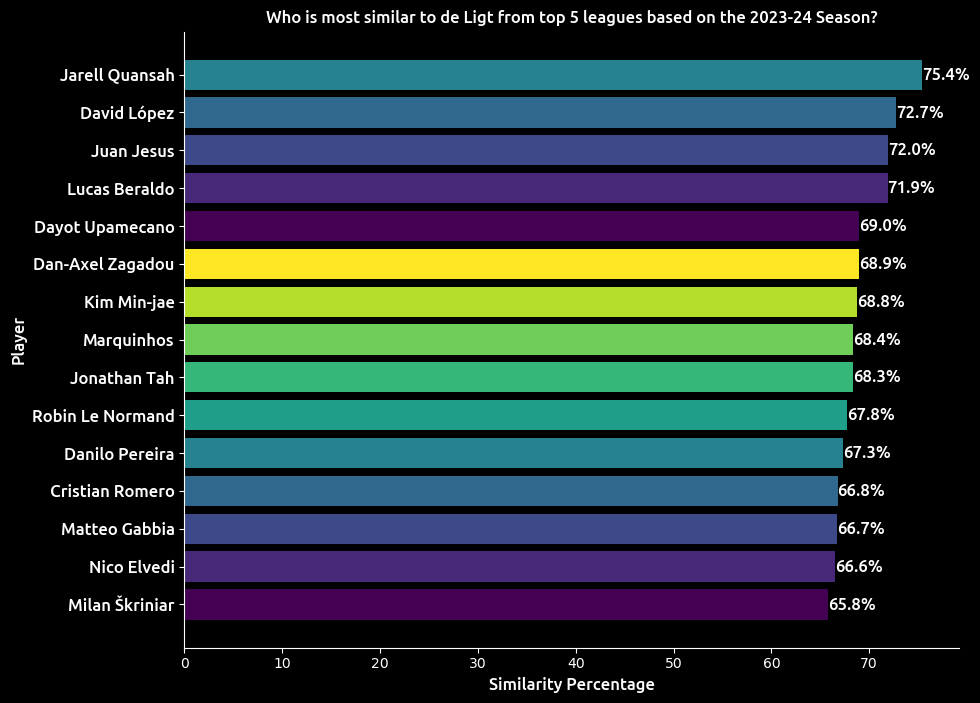

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_deligt_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_deligt_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_deligt_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to de Ligt from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('De Ligt 2024/Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
